### Introduction


Throughout our analysis, we will be using a large data of Asteroids - NeoWs. We will discusses the factors that might be usefull to identify an asteroid as potentially hazardous or not. Also we will explains the classification power of those remaining factors in the absence of absolute magnitude and minimum orbit intersection values. 

Near Earth Objects (NEOs) are comets and asteroids that have been nudged by the gravitational attraction of nearby planets into orbits that allow them to enter the Earth’s neighborhood. The scientific interest in comets and asteroids is due largely to their status as the relatively unchanged remnant debris from the solar system formation process some 4.6 billion years ago. As the primitive, leftover building blocks of the solar system formation process, comets and asteroids offer clues to the chemical mixture from which the planets formed some 4.6 billion years ago. 

### Data

The data is about Asteroids - NeoWs. NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

Acknowledgements Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

### Tasks


* Develop a model that predicts if an asteroid is going to be hazardous or not

To tackle this task I'll use the methods listed below, and extract the results from the method with best performance on unseen data.


In [57]:
# Libraries & Data import

%pylab inline

from collections import defaultdict

import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from fastcluster import linkage
import seaborn as sns
from matplotlib.colors import rgb2hex, colorConverter
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier


Populating the interactive namespace from numpy and matplotlib


### Data Exploration

To begin this exploratory analysis, first we will check the data. 

In [58]:
# Data inspection
df = pd.read_csv('nasa.csv')

In [59]:
pd.set_option('display.max_columns', None)

In [60]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [61]:
df.shape

(4687, 40)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [63]:
#the Neo ref id and name are exactly same
(df['Neo Reference ID'] != df['Name']).sum()

0

In [64]:
#uncertainity and ID should be categorical, change back to int if necessary
df['Orbit Uncertainity'].unique()
len(df['Orbit ID'].unique())

188

In [65]:
#change IDs as an object type

def change_to_obj(col):
    col = col.astype(str)
    return col
# df['Neo Reference ID'].apply(change_to_obj)
# df['Name'].apply(change_to_obj)
# df['Orbit Uncertainity'].apply(change_to_obj)
# df['Orbit ID'].apply(change_to_obj)

change_to_obj(df['Neo Reference ID'])
change_to_obj(df['Name'])
change_to_obj(df['Orbit Uncertainity'])
change_to_obj(df['Orbit ID'])

df['Neo Reference ID'] = df['Neo Reference ID'].astype(str)
df['Name'] = df['Name'].astype(str)
df['Orbit Uncertainity'] = df['Orbit Uncertainity'].astype(str)
df['Orbit ID'] = df['Orbit ID'].astype(str)

In [66]:
#change to pandas dateformat

df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date'])
df['Orbit Determination Date'] = pd.to_datetime(df['Orbit Determination Date'])

In [67]:
#to see the basic statistics
df.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [68]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [69]:
nasa = pd.read_csv("nasa.csv")

nasa.shape
nasa.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

NASA asteriods data contains the information about 4687 asteroids with 40 features.

In [70]:
# Finding the null values. There is no feature with null values.
nasa.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [71]:
# number of distinct elements in columns(features)
# Orbiting Body and Equinox has only one unique value.
nasa.nunique()

Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Est Dia in KM(max)               269
Est Dia in M(min)                269
Est Dia in M(max)                269
Est Dia in Miles(min)            269
Est Dia in Miles(max)            269
Est Dia in Feet(min)             269
Est Dia in Feet(max)             269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Relative Velocity km per hr     4687
Miles per hour                  4687
Miss Dist.(Astronomical)        4673
Miss Dist.(lunar)               4660
Miss Dist.(kilometers)          4661
Miss Dist.(miles)               4660
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date        2680
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Osculation                 429
E

In [72]:
# Drop features that is not relevant(non-unique values, dates, IDs)
nasa.drop(['Neo Reference ID', 'Name', 'Close Approach Date', 'Epoch Date Close Approach', 'Orbit ID', 'Orbit Determination Date', 'Perihelion Time', 'Orbiting Body', 'Equinox'], axis=1, inplace=True)

In [73]:
print(nasa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Relative Velocity km per sec  4687 non-null   float64
 10  Relative Velocity km per hr   4687 non-null   float64
 11  Miles per hour                4687 non-null   float64
 12  Miss Dist.(Astronomical)      4687 non-null   float64
 13  Mis

After dropping irrelevant columns, we get 29 numeric features. The factors that might be useful to identify an asteroid as potentially hazardous are 'Absolute Magnitude', Min and Max of Estimated Diameters, 'Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)','Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant','Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', and 'Mean Motion'.a

In [74]:
X = nasa.iloc[:, :-1]
y = nasa.iloc[:, -1:]

# convert Hazardous boolean values to 0 and 1
y = y*1
y

,Hazardous
0,1
1,0
2,1
3,0
4,1
...,...
4682,0
4683,0
4684,0
4685,0


Absolute Magnitude              0.045392
Est Dia in KM(min)              0.031997
Est Dia in KM(max)              0.030362
Est Dia in M(min)               0.028212
Est Dia in M(max)               0.039715
Est Dia in Miles(min)           0.032422
Est Dia in Miles(max)           0.032862
Est Dia in Feet(min)            0.035553
Est Dia in Feet(max)            0.040105
Relative Velocity km per sec    0.018287
Relative Velocity km per hr     0.017273
Miles per hour                  0.018136
Miss Dist.(Astronomical)        0.018478
Miss Dist.(lunar)               0.017497
Miss Dist.(kilometers)          0.018601
Miss Dist.(miles)               0.018339
Orbit Uncertainity              0.063636
Minimum Orbit Intersection      0.250995
Jupiter Tisserand Invariant     0.017883
Epoch Osculation                0.007188
Eccentricity                    0.024384
Semi Major Axis                 0.017495
Inclination                     0.031898
Asc Node Longitude              0.017678
Orbital Period  

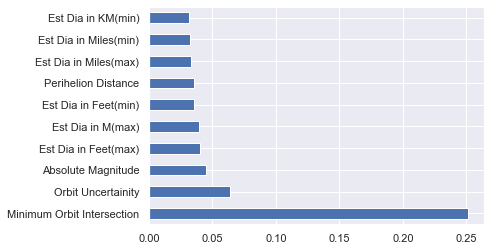

In [75]:
model = ExtraTreesClassifier()
model.fit(X,np.ravel(y,order='C'))

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances)
feat_importances.nlargest(10).plot(kind='barh')
plt.rcParams["figure.figsize"] = (15,10)
plt.savefig("extraTrees")
plt.show()

### Visualizations

Next, use matplotlib to import libraries and define functions for plotting the data.

#### categorical data

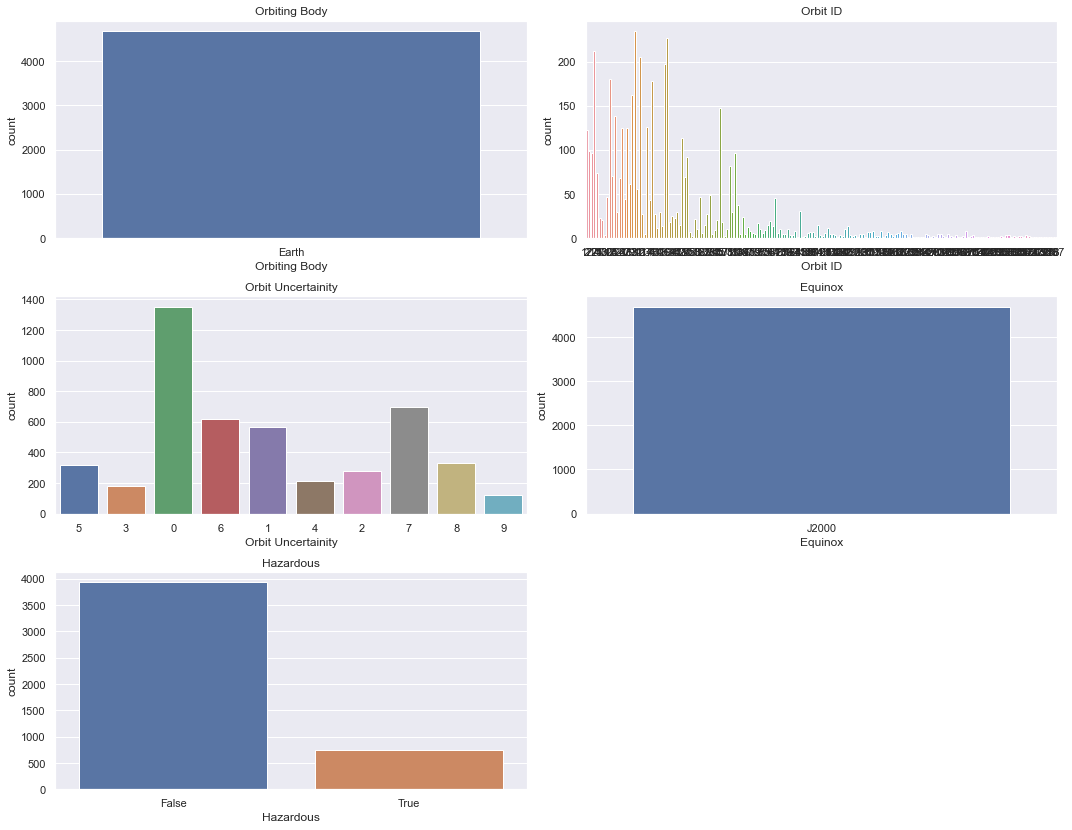

In [76]:
#Orbiting Body

cat_var = ['Orbiting Body', 'Orbit ID', 'Orbit Uncertainity', 'Equinox', 'Hazardous']

plt.figure(figsize=(15,15))

cnt = 1
for i in cat_var:
    plt.subplot(4,2,cnt)
    sns.countplot(df[i])
    plt.title(i)
    cnt=cnt+1
plt.tight_layout()
plt.show();



# plt.figure(figsize=(10,7))

# sns.set_theme(style="darkgrid")
# ax = sns.countplot(x="city", data=member, order = member['city'].value_counts().index)
# plt.title("City Count")
# plt.show();

We see that every Asteroid have the same orbiting body type 'Earth' and Equinox 'J2000'. Therefore, we would not consider these variables in our modelling.

Most asteroid have 0 orbit undertainity type, following 7, 6, and 1.

To closely look at Orbit ID graph,

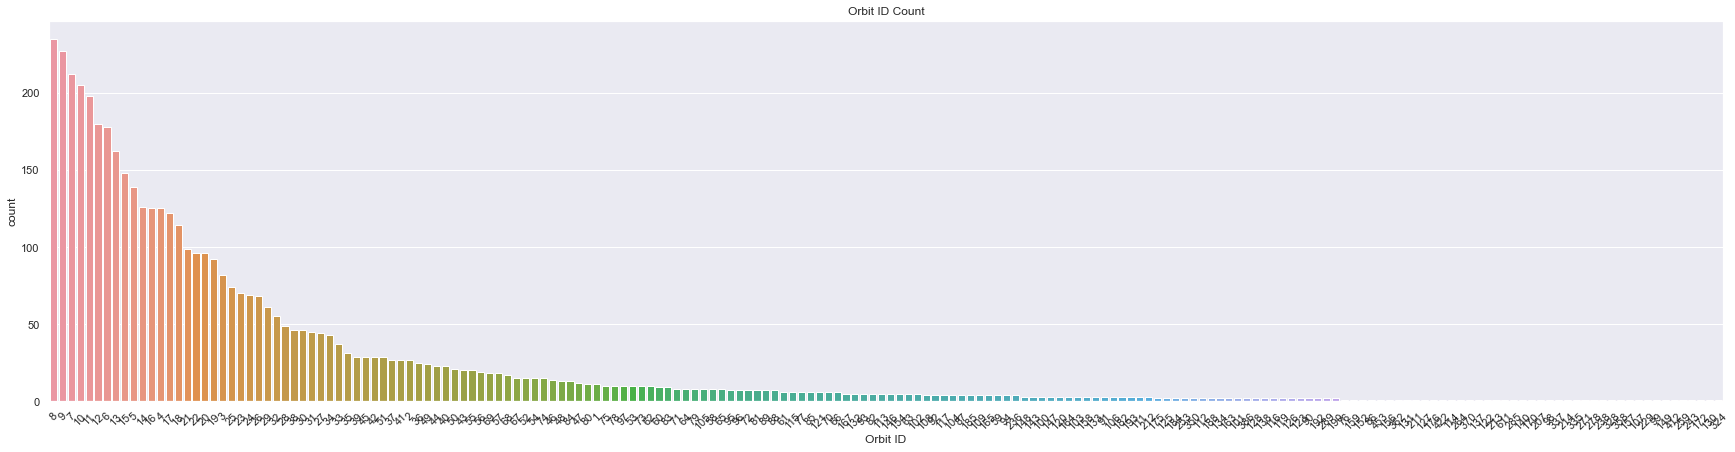

In [77]:
plt.figure(figsize=(30,7))

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Orbit ID", data=df, order = df['Orbit ID'].value_counts().index)
plt.title("Orbit ID Count")
plt.xticks(rotation=45)
plt.show();


In [78]:
sum(df['Hazardous'] == False)/len(df)

0.8389161510561126

About 84% of the astroids are recorded as non hazardous.

### Continuous Variable

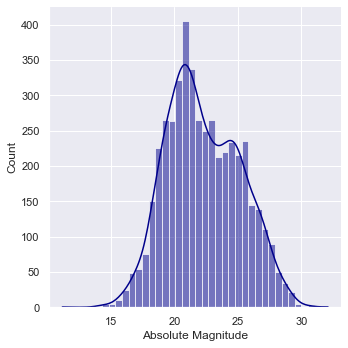

In [79]:
#Absolute Magnitude
sns.displot(df['Absolute Magnitude'], kind="hist", kde=True, color='darkblue')

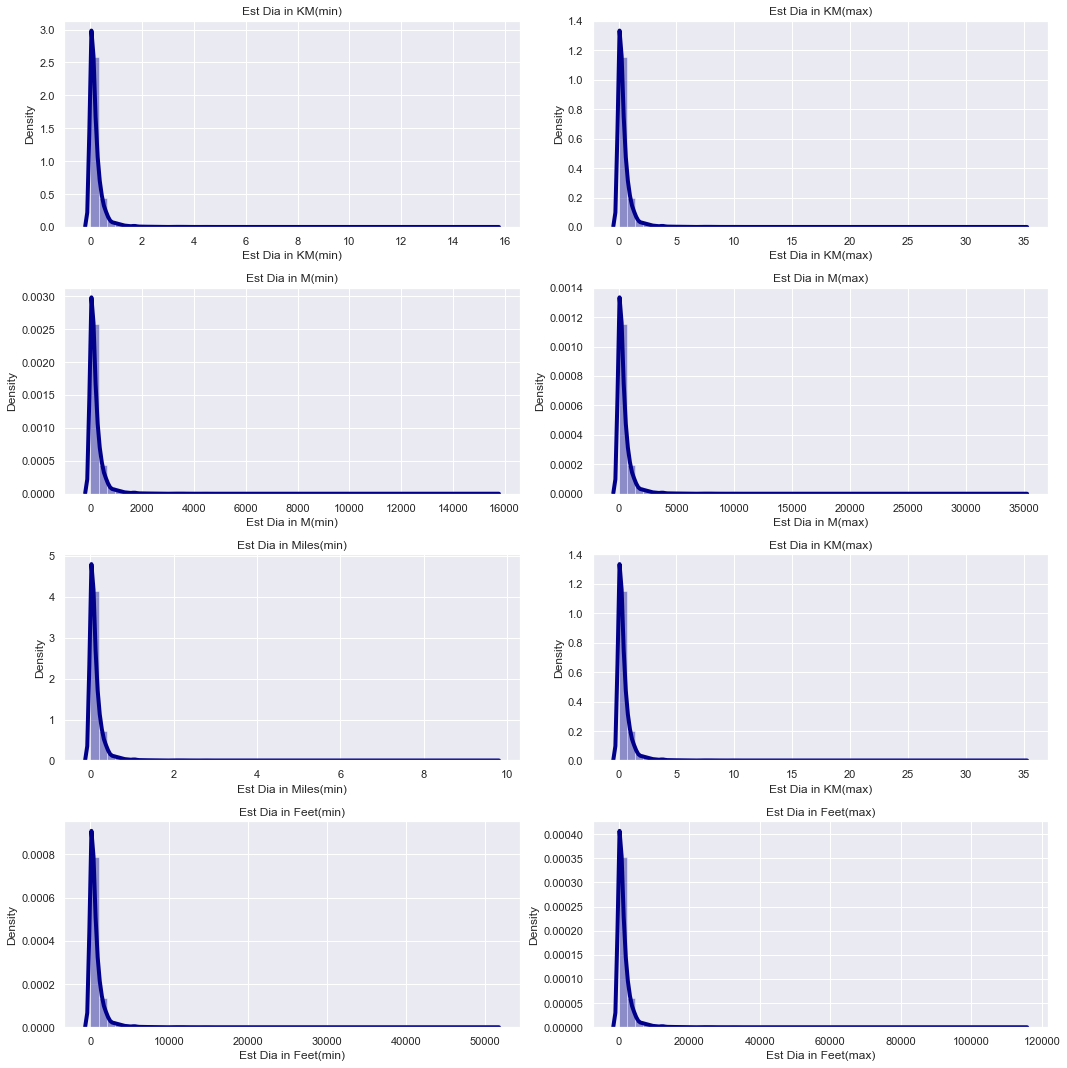

In [80]:
#est dia
est_col_names = ['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 
                  'Est Dia in Miles(min)', 'Est Dia in KM(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)']

plt.figure(figsize=(15,15))
cnt=1
for i in est_col_names:
    plt.subplot(4,2,cnt)
    sns.distplot(df[i], hist=True, color = 'darkblue', kde_kws={'linewidth': 4})
    plt.title(i)
    cnt=cnt+1
plt.tight_layout()
plt.show()

### Analysis

In [81]:
ndf = df.copy()
ndf.drop(['Close Approach Date','Orbiting Body','Orbit Determination Date','Equinox','Hazardous'],inplace=True,axis=1)

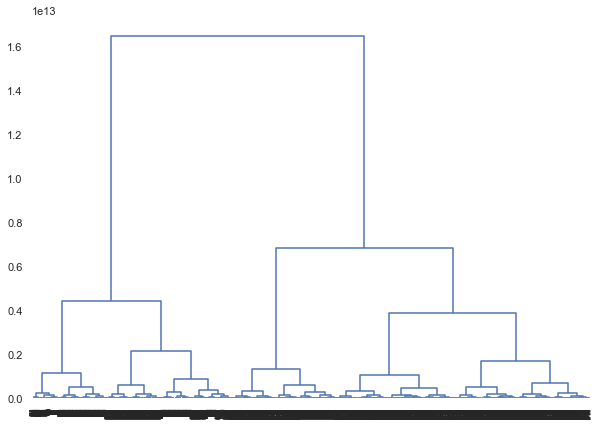

In [82]:
linked = linkage(ndf, 'ward')

plt.figure(figsize=(10,7))
dendrogram(linked,
           color_threshold=-1,
           orientation='top',
           )
plt.axhline(y=150, color='r', linestyle='--')
plt.show()


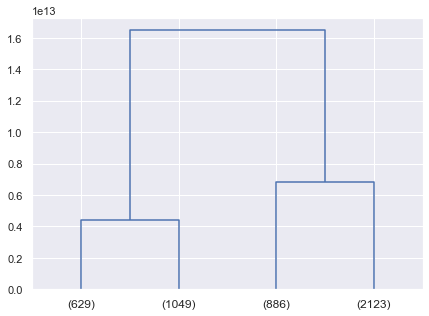

In [83]:
inked = linkage(ndf, 'single')

# truncated and count each cluster
plt.figure(figsize=(7,5))
dendrogram(linked,
           p=4, 
           truncate_mode='lastp',
           color_threshold=-1,
           orientation='top',
           show_leaf_counts=True
           )
plt.show()

### Data Splitting

Baseline Accuracy for this Test Set = 84.54
Baseline Accuracy for this Train Set = 83.72

Accuracy of Naive Bayes for Test Set = 0.8454157782515992
Accuracy of Naive Bayes for Train Set = 0.8372899439850627

Accuracy of SVC for Test Set = 0.8454157782515992
Accuracy of SVC for Train Set = 0.8372899439850627

Accuracy of Decision Tree for Test Set = 0.9936034115138592
Accuracy of Decision Tree for Train Set = 1.0



OSError: dlopen(/Users/wook/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/wook/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

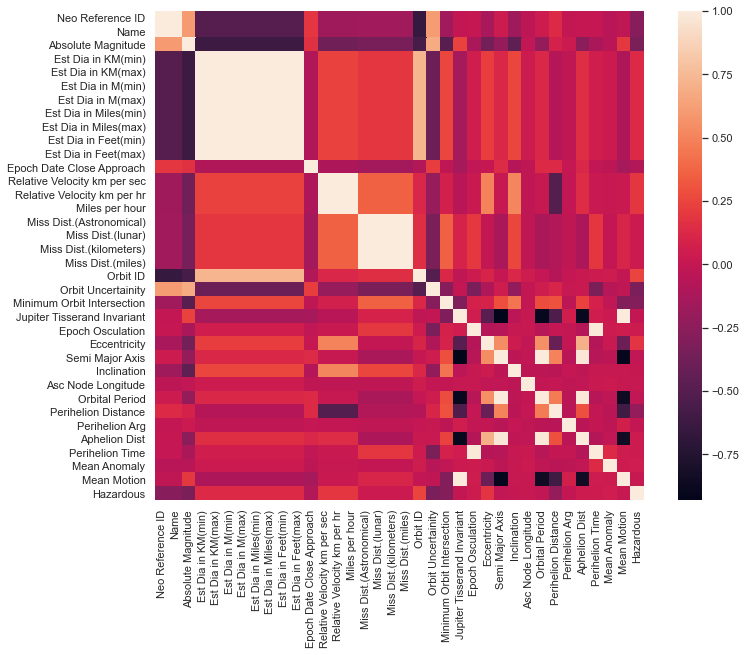

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

df = pd.read_csv('nasa.csv')

df.isnull().sum()


df['Hazardous'].value_counts()
df['Hazardous'] = df['Hazardous'].map({True: 1, False: 0})

df['Close Approach Date'].value_counts()
del df['Close Approach Date']

df['Orbiting Body'].value_counts()
del df['Orbiting Body']

del df['Orbit Determination Date']

df['Equinox'].value_counts()
del df['Equinox']


corrmat = df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 1, square = True)


## Baseline accuracy = 83.89%
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y,test_size = 0.2 , random_state = 0)

a = pd.DataFrame(y_test)
a[0].value_counts()
print("Baseline Accuracy for this Test Set = 84.54")

a = pd.DataFrame(y_train)
a[0].value_counts()
print('Baseline Accuracy for this Train Set = 83.72')
print()


def classifiers(clf, name):
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    from sklearn.metrics import confusion_matrix
    cm_test = confusion_matrix(y_pred, y_test)
    cm_train = confusion_matrix(y_pred_train, y_train)
    
    print('Accuracy of {} for Test Set = {}'.format(name, (cm_test[1][1] + cm_test[0][0])/len(y_test)))
    print('Accuracy of {} for Train Set = {}'.format(name, (cm_train[1][1] + cm_train[0][0])/len(y_train)))
    print()
    
    return cm_train, cm_test



from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
cm_train, cm_test = classifiers(clf, 'Naive Bayes')


from sklearn.svm import SVC
clf = SVC(kernel = 'rbf')
clf.fit(X_train, y_train)
cm_train, cm_test = classifiers(clf, 'SVC')


from sklearn.tree import DecisionTreeClassifier as DTC
clf = DTC()
clf.fit(X_train, y_train)
cm_train, cm_test = classifiers(clf, 'Decision Tree')


import lightgbm as lgb
    
d_train = lgb.Dataset(X_train, label = y_train)
params = {}
clf = lgb.train(params, d_train, 100)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

for i in range(0, len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred[i] = 0
    else:
        y_pred[i] = 1
        
for i in range(0, len(y_pred_train)):
    if y_pred_train[i] < 0.5:
        y_pred_train[i] = 0
    else:
        y_pred_train[i] = 1


from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy of {} for Test Set = {}'.format('LightGBM', (cm_test[1][1] + cm_test[0][0])/len(y_test)))
print('Accuracy of {} for Train Set = {}'.format('LightGBM', (cm_train[1][1] + cm_train[0][0])/len(y_train)))
print()

### Conclusion